In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
# 그래프의 크기와 해상도를 설정합니다.
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 100

In [4]:
curpath=os.getcwd()
curpath

'C:\\DataScience\\project\\시각화_Testing'

In [5]:
avg_movie = pd.read_csv("./data/2019_평균자료_영화.csv", thousands=',', encoding='UTF-8')

seoul_movie_2020 = pd.read_csv("./data/seoul_movie_2020.csv", thousands=',', encoding='UTF-8')
busan_movie_2020 = pd.read_csv("./data/busan_movie_2020.csv", thousands=',', encoding='UTF-8')

busan_movie_2020_012 = pd.read_csv("./data/2021_~02부산.csv", thousands=',', encoding='UTF-8')
busan_movie_2020_036 = pd.read_csv("./data/2021_03~06부산.csv", thousands=',', encoding='UTF-8')

seoul_movie_2020_012 = pd.read_csv("./data/2021_~02서울.csv", thousands=',', encoding='UTF-8')
seoul_movie_2020_036 = pd.read_csv("./data/2021_03~06서울.csv", thousands=',', encoding='UTF-8')

In [6]:
busan=pd.concat([busan_movie_2020,busan_movie_2020_012,busan_movie_2020_036])
seoul=pd.concat([seoul_movie_2020,seoul_movie_2020_012,seoul_movie_2020_036])
ALL=pd.concat([seoul,busan])

In [7]:
busan.tail()

,Unnamed: 0,지역,매출액,관객수,주
12,7,부산시,814105630,90495,2021-05-28
13,7,부산시,733089700,79243,2021-06-04
14,7,부산시,780069950,82722,2021-06-11
15,7,부산시,679511920,71450,2021-06-18
16,7,부산시,858280140,89771,2021-06-25


In [8]:
## 백신기준
def isvVC_date(x):
    if x>='2021-03-11':
         return True
    else:
         return False

In [9]:
busan['백신여부']=busan['주'].apply(isvVC_date)
busan.tail()

,Unnamed: 0,지역,매출액,관객수,주,백신여부
12,7,부산시,814105630,90495,2021-05-28,True
13,7,부산시,733089700,79243,2021-06-04,True
14,7,부산시,780069950,82722,2021-06-11,True
15,7,부산시,679511920,71450,2021-06-18,True
16,7,부산시,858280140,89771,2021-06-25,True


In [10]:
## 거리두기 기준
'''
[부산 거리두기단계]
2020.08.23 ~ 09.12 : 2단계
2020.09.13 ~ 10.11 : 2단계
2020.10.12 ~ 11.30 : 1단계
2020.12.01 ~ 12.14 : 2단계
2020.12.15 ~ 2021.01.24 : 2.5단계
2021.01.25 ~ 02.14 : 2단계
2021.02.15 ~ 04.01 : 1.5단계
2021.04.02 ~ 05.23 : 2단계
2021.05.24 ~ : 1.5단계
'''

def distance_date(x):
    if x<='2020-09-12':
         return 2
    elif x<='2020-10-11':
         return 2
    elif x<='2020-11-30':
        return 1
    elif x<='2020-12-14':
        return 2
    elif x<='2021-01-24':
        return 2.5
    elif x<='2021-02-14':
        return 2
    elif x<="2021-04-01":
        return 1.5
    elif x<="2021-05-23":
        return 2
    else:
        return 1.5

'\n[부산 거리두기단계]\n2020.08.23 ~ 09.12 : 2단계\n2020.09.13 ~ 10.11 : 2단계\n2020.10.12 ~ 11.30 : 1단계\n2020.12.01 ~ 12.14 : 2단계\n2020.12.15 ~ 2021.01.24 : 2.5단계\n2021.01.25 ~ 02.14 : 2단계\n2021.02.15 ~ 04.01 : 1.5단계\n2021.04.02 ~ 05.23 : 2단계\n2021.05.24 ~ : 1.5단계\n'

In [11]:
busan['거리두기']=busan['주'].apply(distance_date)
busan.head()

,Unnamed: 0,지역,매출액,관객수,주,백신여부,거리두기
0,7,부산시,1114537230,123943,2020-08-16,False,2.0
1,7,부산시,618924290,71890,2020-08-23,False,2.0
2,7,부산시,467448880,53630,2020-08-30,False,2.0
3,7,부산시,401747560,45878,2020-09-06,False,2.0
4,7,부산시,350543860,40374,2020-09-13,False,2.0


In [12]:
busan_vc_atfer= busan[busan['백신여부'] == True]
busan_vc_before = busan[busan['백신여부'] == False]

In [13]:
busan_vc_before.dtypes #백신접종 이전

Unnamed: 0      int64
지역             object
매출액             int64
관객수             int64
주              object
백신여부             bool
거리두기          float64
dtype: object

In [14]:
busan_vc_atfer.dtypes #백신접종 이후

Unnamed: 0      int64
지역             object
매출액             int64
관객수             int64
주              object
백신여부             bool
거리두기          float64
dtype: object

In [25]:
busan_vc_before

,Unnamed: 0,지역,매출액,관객수,주,백신여부,거리두기
0,7,부산시,1114537230,123943,2020-08-16,False,2.0
1,7,부산시,618924290,71890,2020-08-23,False,2.0
2,7,부산시,467448880,53630,2020-08-30,False,2.0
3,7,부산시,401747560,45878,2020-09-06,False,2.0
4,7,부산시,350543860,40374,2020-09-13,False,2.0
5,7,부산시,369444420,43470,2020-09-20,False,2.0
6,7,부산시,1270147320,137503,2020-09-27,False,2.0
7,7,부산시,677889690,74197,2020-10-04,False,2.0
8,7,부산시,425792690,46497,2020-10-11,False,2.0
9,7,부산시,517480560,57976,2020-10-18,False,1.0


## matplotlib.pyplot 버전 그래프

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

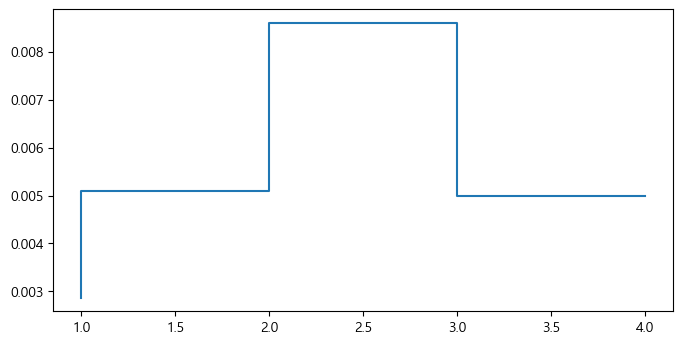

In [32]:
x = [1,2,3,4]
y = [0.002871, 0.0051, 0.0086, 0.005]
sns.lineplot(x,y, drawstyle='steps-pre')
plt.show()

### busan_vc_before 시각화 : 백신접종 이전

Text(0.5, 0, '백신접종 이전 기간 (단위 : 주)')

Text(0, 0.5, '매출액')

Text(0, 0.5, '거리두기')

Text(0.5, 1.0, '백신접종 이전 영화 매출액 및 거리두기(부산)')

(0.0, 3.0)

<ipython-input-46-1c1eec950f14>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(busan_vc_before['주'], rotation=45, ha='right')


[Text(0, 0, '2020-08-16'),
 Text(1, 0, '2020-08-23'),
 Text(2, 0, '2020-08-30'),
 Text(3, 0, '2020-09-06'),
 Text(4, 0, '2020-09-13'),
 Text(5, 0, '2020-09-20'),
 Text(6, 0, '2020-09-27'),
 Text(7, 0, '2020-10-04'),
 Text(8, 0, '2020-10-11'),
 Text(9, 0, '2020-10-18'),
 Text(10, 0, '2020-10-25'),
 Text(11, 0, '2020-11-01'),
 Text(12, 0, '2020-11-08'),
 Text(13, 0, '2020-11-15'),
 Text(14, 0, '2020-11-22'),
 Text(15, 0, '2020-11-29'),
 Text(16, 0, '2020-12-06'),
 Text(17, 0, '2020-12-13'),
 Text(18, 0, '2020-12-20'),
 Text(19, 0, '2020-12-27'),
 Text(20, 0, '2021-01-01'),
 Text(21, 0, '2021-01-08'),
 Text(22, 0, '2021-01-15'),
 Text(23, 0, '2021-01-22'),
 Text(24, 0, '2021-01-29'),
 Text(25, 0, '2021-02-05'),
 Text(26, 0, '2021-02-12'),
 Text(27, 0, '2021-02-19'),
 Text(28, 0, '2021-02-26'),
 Text(29, 0, '2021-03-05')]

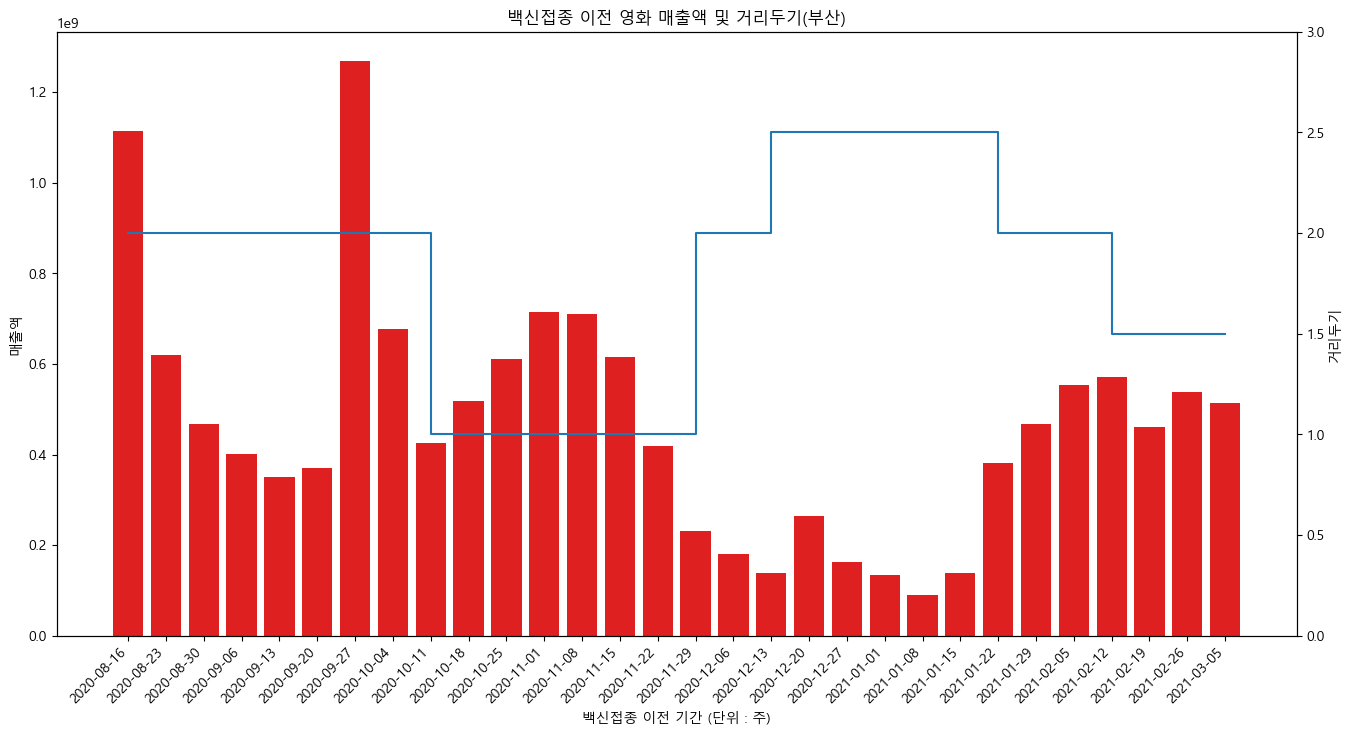

In [46]:
x = busan_vc_before['주']
y = busan_vc_before['매출액']
y1 = busan_vc_before['거리두기']

fig, ax1 = plt.subplots()

ax = plt.gca()
ax2 = ax1.twinx()

fig1 = sns.barplot(x=x, y=y, ax=ax1, color='Red')
fig2 = sns.lineplot(x=x, y=y1, drawstyle='steps-pre', ax=ax2)


#ax2=busan_vc_before.plot(kind='line', x='주', y='거리두기', secondary_y=True,color='Red', ax=ax)
ax.set_xlabel('백신접종 이전 기간 (단위 : 주)')
ax.set_ylabel('매출액')
ax2.set_ylabel('거리두기')

#plt.tight_layout()

plt.title("백신접종 이전 영화 매출액 및 거리두기(부산)")
plt.gcf().set_size_inches(16, 8)
plt.ylim([0, 3])
ax.set_xticklabels(busan_vc_before['주'], rotation=45, ha='right')
plt.show()

### busan_vc_atfer 시각화 : 백신접종 이후

Text(0.5, 0, '백신접종 이후 기간 (단위 : 주)')

Text(0, 0.5, '매출액')

Text(0, 0.5, '거리두기')

Text(0.5, 1.0, '백신접종 이후 영화 매출액 및 거리두기(부산)')

(0.0, 3.0)

<ipython-input-47-ccda2fbe21d3>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(busan_vc_atfer['주'], rotation=45, ha='right')


[Text(0, 0, '2021-03-12'),
 Text(1, 0, '2021-03-12'),
 Text(2, 0, '2021-03-19'),
 Text(3, 0, '2021-03-26'),
 Text(4, 0, '2021-04-02'),
 Text(5, 0, '2021-04-09'),
 Text(6, 0, '2021-04-16'),
 Text(7, 0, '2021-04-23'),
 Text(8, 0, '2021-04-30'),
 Text(9, 0, '2021-05-07'),
 Text(10, 0, '2021-05-14'),
 Text(11, 0, '2021-05-21'),
 Text(12, 0, '2021-05-28'),
 Text(13, 0, '2021-06-04'),
 Text(14, 0, '2021-06-11'),
 Text(15, 0, '2021-06-18')]

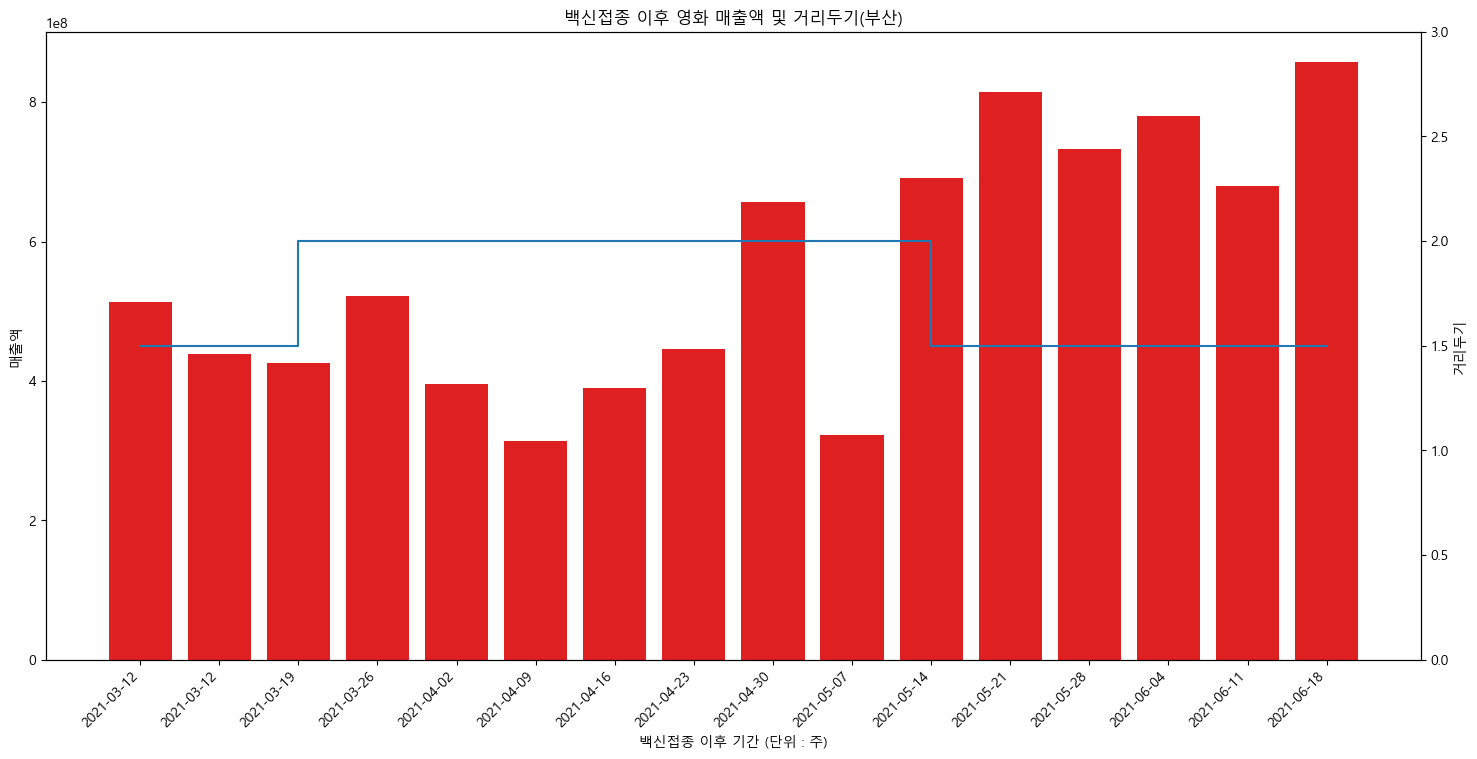

In [47]:
x = busan_vc_atfer['주']
y = busan_vc_atfer['매출액']
y1 = busan_vc_atfer['거리두기']


fig, ax1 = plt.subplots()

ax = plt.gca()
ax2 = ax1.twinx()

fig1 = sns.barplot(x=x, y=y, ax=ax1, color='Red')
fig2 = sns.lineplot(x=x, y=y1, drawstyle='steps-pre', ax=ax2)


ax.set_xlabel('백신접종 이후 기간 (단위 : 주)')
ax.set_ylabel('매출액')
ax2.set_ylabel('거리두기')

plt.tight_layout()

plt.title("백신접종 이후 영화 매출액 및 거리두기(부산)")
plt.gcf().set_size_inches(16, 8)
plt.ylim([0, 3])
ax.set_xticklabels(busan_vc_atfer['주'], rotation=45, ha='right')
plt.show()

## 추가. seaborn 버전

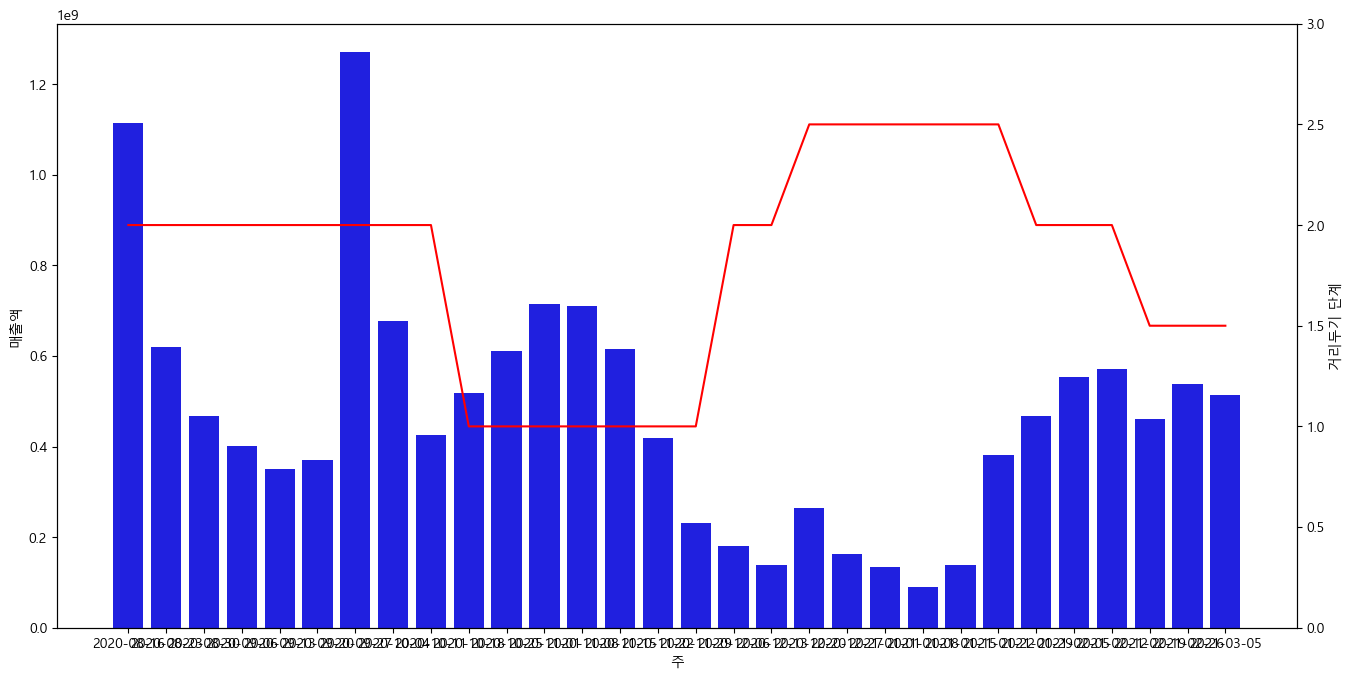

In [219]:
# These lines generate the data to be plotted
x = busan_vc_before['주']
y = busan_vc_before['매출액']
y1 =busan_vc_before['거리두기']

fig, ax1 = plt.subplots() # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.barplot(x = x, y = y, ax = ax1, color = 'blue') # plots the first set of data, and sets it to ax1. 
sns.lineplot(x = x, y = y1, color = 'red', ax = ax2) # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
ax1.set_xlabel('주')
ax1.set_ylabel('매출액')
ax2.set_ylabel('거리두기 단계')

plt.gcf().set_size_inches(16, 8)
plt.ylim([0, 3])
plt.xticks(rotation=45)

plt.show(); # shows the plot. 

In [218]:
# 지역별 전체 비교그래프
#ALL2 = ALL.sort_values(by = ['주', '지역'])
#sns.catplot(data = ALL2, x = '주', y = '매출액', col = '지역', kind = 'bar', palette = 'Blues', legend_out = False);

#plt.gcf().set_size_inches(24, 8)